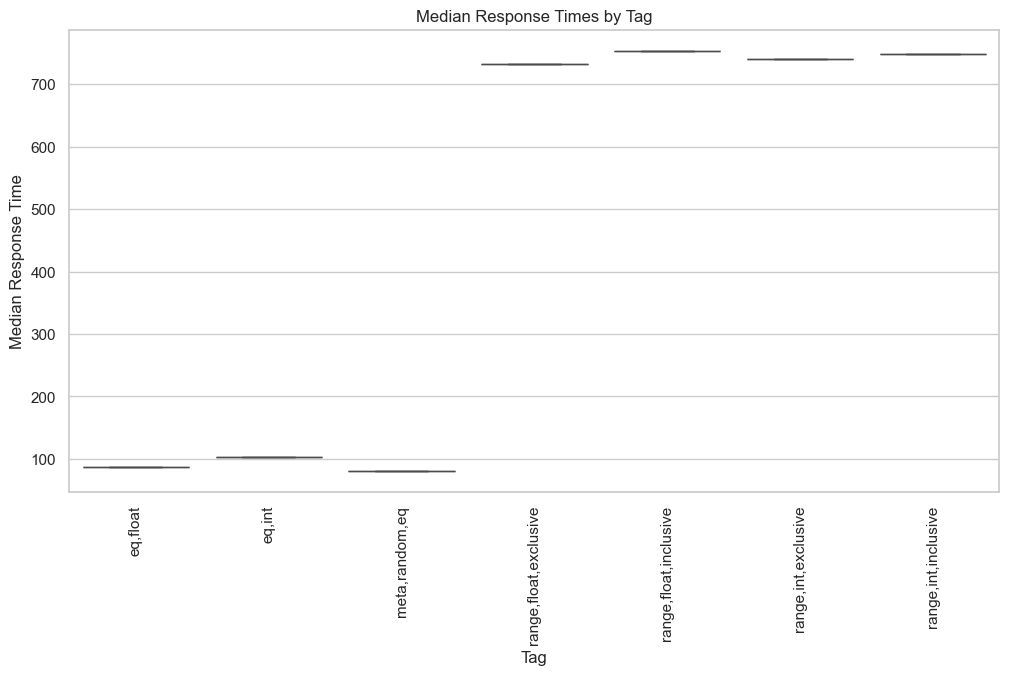

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_parquet("../merged_locust_data.parquet", engine='pyarrow')
# Filtering rows with element containing "range"
# filtered_df = df[df['tags'].apply(lambda x: 'range' in x)]
df.loc[:, "tags"] = df["tags"].apply(lambda x: ",".join(x))
# Filtering rows with data_set "100k"
filtered_df = df[df['dataset'] == "100k"]
sns.set(style="whitegrid")
# Calculating the median response time for each tag
median_response_times = filtered_df.groupby('tags')['response_time'].median().reset_index()
median_response_times.columns = ['Tag', 'Median Response Time']

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tag', y='Median Response Time', data=median_response_times)
plt.title('Median Response Times by Tag')
plt.xlabel('Tag')
plt.ylabel('Median Response Time')
plt.xticks(rotation=90)
plt.show()